In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("D:\BaiduNetdiskDownload\Blockdata\eth-usd-max1.xlsx",sheet_name= 'eth-usd-max')
selected_data = data.iloc[2704:]

In [3]:
print(selected_data)
selected_data.head()

                   snapped_at        price    market_cap  total_volume
2704  2023-01-02 00:00:00 UTC  1200.659217  1.450000e+11  2.179799e+09
2705  2023-01-03 00:00:00 UTC  1214.378946  1.460000e+11  3.845096e+09
2706  2023-01-04 00:00:00 UTC  1214.760969  1.460000e+11  3.385567e+09
2707  2023-01-05 00:00:00 UTC  1256.436604  1.510000e+11  6.727208e+09
2708  2023-01-06 00:00:00 UTC  1250.792252  1.510000e+11  4.052352e+09
...                       ...          ...           ...           ...
2980  2023-10-05 00:00:00 UTC  1648.193373  1.980000e+11  8.175156e+09
2981  2023-10-06 00:00:00 UTC  1612.994889  1.940000e+11  8.787267e+09
2982  2023-10-07 00:00:00 UTC  1646.393402  1.980000e+11  8.345309e+09
2983  2023-10-08 00:00:00 UTC  1635.082855  1.970000e+11  3.685199e+09
2984  2023-10-09 00:00:00 UTC  1634.221655  1.960000e+11  5.142740e+09

[281 rows x 4 columns]


,snapped_at,price,market_cap,total_volume
2704,2023-01-02 00:00:00 UTC,1200.659217,1.450000e+11,2.179799e+09
2705,2023-01-03 00:00:00 UTC,1214.378946,1.460000e+11,3.845096e+09
2706,2023-01-04 00:00:00 UTC,1214.760969,1.460000e+11,3.385567e+09
2707,2023-01-05 00:00:00 UTC,1256.436604,1.510000e+11,6.727208e+09
2708,2023-01-06 00:00:00 UTC,1250.792252,1.510000e+11,4.052352e+09


In [4]:
## strategy1,买跌卖涨

zgpa_signal = pd.DataFrame()
zgpa_signal = selected_data.loc[:,['snapped_at','price']]
zgpa_signal['snapped_at'] = pd.to_datetime(zgpa_signal['snapped_at'])
zgpa_signal['date'] = zgpa_signal['snapped_at'].dt.date
zgpa_signal = zgpa_signal.drop('snapped_at',axis=1)

desired_column = zgpa_signal['date']
zgpa_signal.drop('date',axis=1,inplace=True)
zgpa_signal.insert(0,'Date',desired_column)

zgpa_signal['diff'] = zgpa_signal['price'].diff()
zgpa_signal = zgpa_signal.fillna(0.0)
zgpa_signal['signal'] = np.where(zgpa_signal['diff'] >= 0, 0, 1)

zgpa_signal['order'] = zgpa_signal['signal'].diff()
zgpa_signal['order'] = zgpa_signal['order'].fillna(0.0)

print(zgpa_signal)

            Date        price       diff  signal  order
2704  2023-01-02  1200.659217   0.000000       1    0.0
2705  2023-01-03  1214.378946  13.719729       1    0.0
2706  2023-01-04  1214.760969   0.382023       1    0.0
2707  2023-01-05  1256.436604  41.675635       1    0.0
2708  2023-01-06  1250.792252  -5.644352       0   -1.0
...          ...          ...        ...     ...    ...
2980  2023-10-05  1648.193373  -8.128630       0    0.0
2981  2023-10-06  1612.994889 -35.198484       0    0.0
2982  2023-10-07  1646.393402  33.398513       1    1.0
2983  2023-10-08  1635.082855 -11.310547       0   -1.0
2984  2023-10-09  1634.221655  -0.861200       0    0.0

[281 rows x 5 columns]


In [5]:
initial_cash = 20000.00
initial_stock = 0
row_count = len(zgpa_signal)

zgpa_signal['cash'] = zgpa_signal['stock'] = 0
zgpa_signal.iloc[0,5] = initial_cash
zgpa_signal.iloc[0,6] = initial_stock
for i in range(1,row_count):
    zgpa_signal.iloc[i,5] = zgpa_signal.iloc[i-1,5] - (zgpa_signal.iloc[i-1,5]//zgpa_signal.iloc[i,1])*zgpa_signal.iloc[i,1]*zgpa_signal.iloc[i,4] - zgpa_signal.iloc[i-1,6]*zgpa_signal.iloc[i,1]*zgpa_signal.iloc[i,4]
    zgpa_signal.iloc[i,6] = zgpa_signal.iloc[i-1,6] + (zgpa_signal.iloc[i-1,5]//zgpa_signal.iloc[i,1])*zgpa_signal.iloc[i,4] + zgpa_signal.iloc[i-1,6]*zgpa_signal.iloc[i,4]
zgpa_signal['total'] = zgpa_signal['cash'] + zgpa_signal['stock']*zgpa_signal['price']

zgpa_signal.head(10)

,Date,price,diff,signal,order,cash,stock,total
2704,2023-01-02,1200.659217,0.000000,1,0.0,20000.000000,0,20000.000000
2705,2023-01-03,1214.378946,13.719729,1,0.0,20000.000000,0,20000.000000
2706,2023-01-04,1214.760969,0.382023,1,0.0,20000.000000,0,20000.000000
2707,2023-01-05,1256.436604,41.675635,1,0.0,20000.000000,0,20000.000000
2708,2023-01-06,1250.792252,-5.644352,0,-1.0,38761.883780,-15,20000.000000
2709,2023-01-07,1270.028610,19.236358,1,1.0,19711.454630,0,19711.454630
2710,2023-01-08,1264.836943,-5.191667,0,-1.0,38684.008775,-15,19711.454630
2711,2023-01-09,1284.575404,19.738461,1,1.0,19415.377715,0,19415.377715
2712,2023-01-10,1321.676571,37.101167,1,0.0,19415.377715,0,19415.377715
2713,2023-01-11,1336.017072,14.340501,1,0.0,19415.377715,0,19415.377715


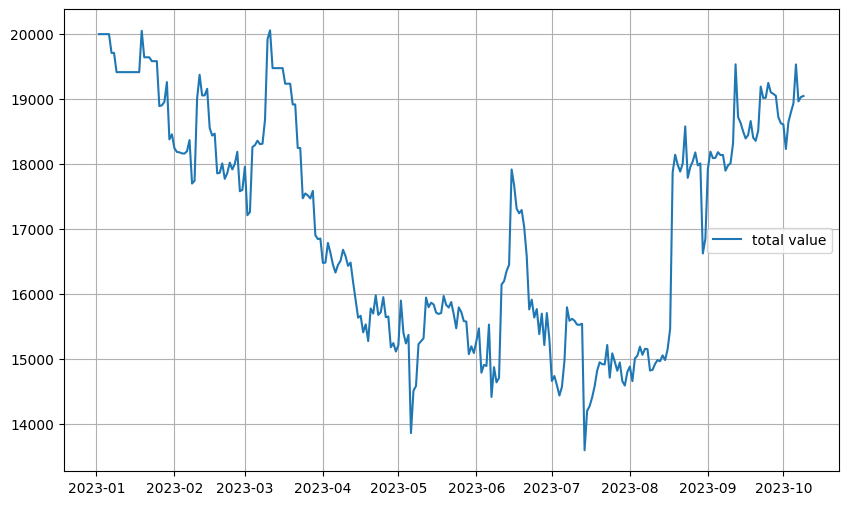

In [6]:
plt.figure(figsize=(10,6))
plt.plot(zgpa_signal['Date'],zgpa_signal['total'],label = 'total value')
plt.grid()
plt.legend(loc = 'center right')
plt.show()

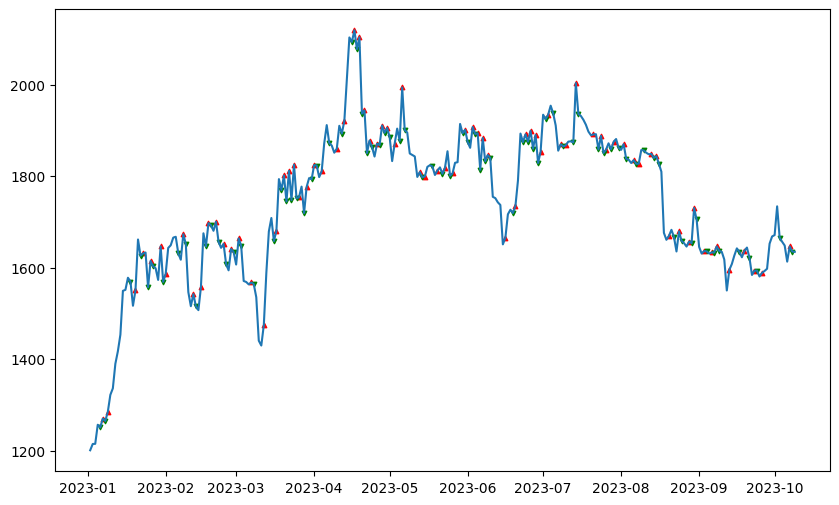

In [7]:
plt.figure(figsize=(10,6))
plt.plot(zgpa_signal['Date'],zgpa_signal['price'])
plt.scatter(zgpa_signal['Date'].loc[zgpa_signal.order==1],zgpa_signal['price'][zgpa_signal.order==1],marker='^',s=10,c='r')
plt.scatter(zgpa_signal['Date'].loc[zgpa_signal.order==-1],zgpa_signal['price'][zgpa_signal.order==-1],marker='v',s=10,c='g')
plt.show()